In [1]:
using Percolation, PyPlot

# percolation

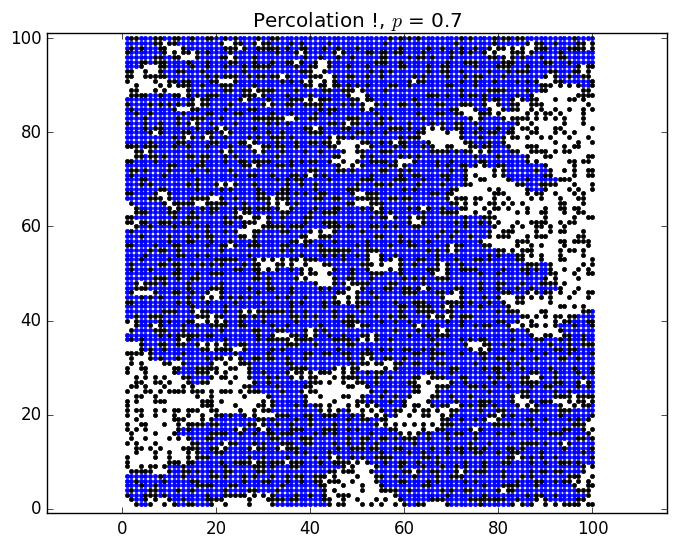

4-element Array{Int64,1}:
  -1
 101
  -1
 101

In [31]:
N = 100
p = 0.7
site = honeycomb(N, p)
percolation(site)
percolationplot(site)
axis([-1, N+1, -1, N+1])

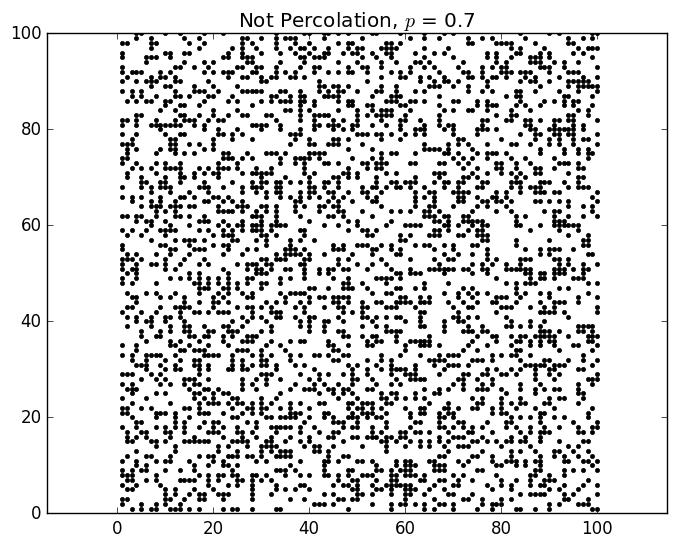

In [3]:
percolationplot(site, waterplot=false)

# cluster

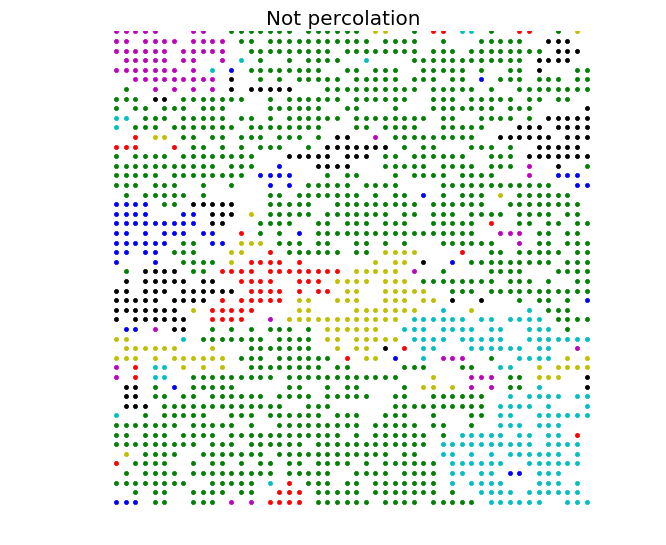

  0.368258 seconds (202.83 k allocations: 13.517 MB, 3.17% gc time)


In [4]:
site = honeycomb(50,0.7)
@time cluster(site)
clusterplot(site)

# order parameter

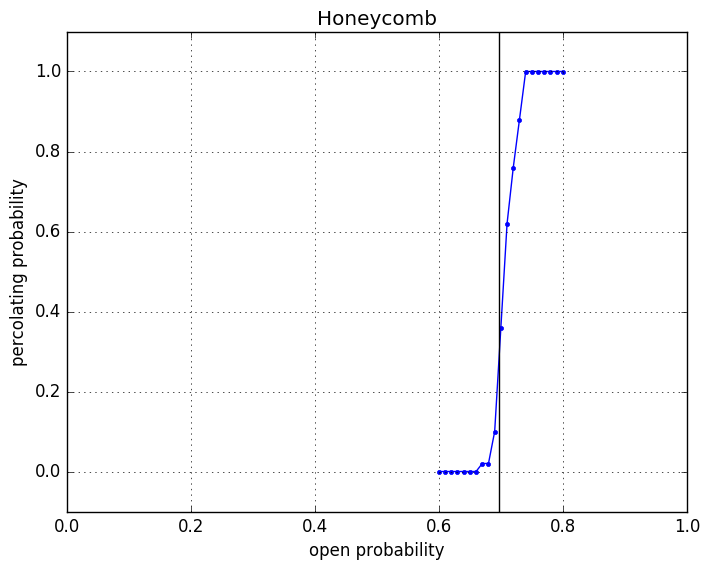

  7.698237 seconds (20.91 M allocations: 16.166 GB, 26.16% gc time)


In [5]:
plist = collect(0.6:0.01:0.8)
hit = zeros(Int, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        site = honeycomb(N, plist[i])
        hit[i] += percolation(site)
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.6962, 0.6962], [-0.5, 1.1], "k")
grid("on")
title("Honeycomb")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

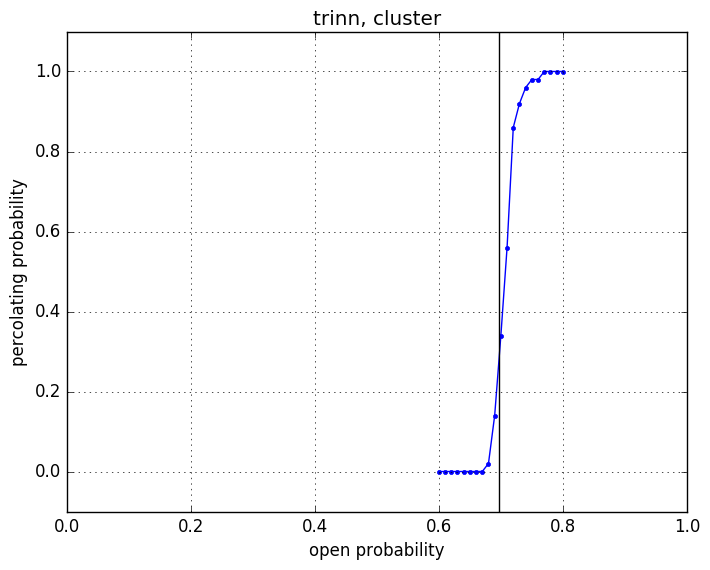

 94.343723 seconds (100.18 M allocations: 249.695 GB, 16.41% gc time)


In [6]:
# cluster
plist = collect(0.6:0.01:0.8)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        site = honeycomb(N, plist[i])
        cluster(site)
        hit[i] += site.PercolationOrNot
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.6962, 0.6962], [-0.5, 1.1], "k")
grid("on")
title("trinn, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);